In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
from torch import tensor, nn
import numpy as np
import torch

## 0. Tensor

torch.Tensor是一种包含单一数据类型元素的多维矩阵。Torch定义了七种CPU tensor类型和八种GPU tensor类型：

|Data type|	 CPU tensor | GPU tensor|
|:---|:---|:---|
|32-bit floating point|	torch.FloatTensor|	torch.cuda.FloatTensor|
|64-bit floating point|	torch.DoubleTensor|	torch.cuda.DoubleTensor|
|16-bit floating point|	N/A|	torch.cuda.HalfTensor|
|8-bit integer (unsigned)|	torch.ByteTensor|	torch.cuda.ByteTensor|
|8-bit integer (signed)|	torch.CharTensor|	torch.cuda.CharTensor|
|16-bit integer (signed)|	torch.ShortTensor|	torch.cuda.ShortTensor|
|32-bit integer (signed)|	torch.IntTensor|	torch.cuda.IntTensor|
|64-bit integer (signed)|	torch.LongTensor|	torch.cuda.LongTensor|

In [2]:
torch.ones_like(torch.arange(10))

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [2]:
torch.arange(10) @ torch.arange(10)

tensor(285)

In [3]:
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.ones_like(np.arange(10))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- `torch.tensor`和`torch.Tensor`的区别

In [ ]:
torch.__version__

In [5]:
torch.Tensor([5, 4])

tensor([5., 4.])

In [6]:
torch.Tensor([5, 4]).type()  # 转换为默认的FLoatTensor类型

'torch.FloatTensor'

In [7]:
torch.tensor([5, 4])  # tensor接受已经存在的数据

tensor([5, 4])

In [8]:
torch.tensor([5, 4]).type()  # tensor接受已经存在的数据

'torch.LongTensor'

In [9]:
torch.Tensor(5, 4)  #  Tensor创建一个多维矩阵，注意和torch.Tensor([5, 4])之间的区别

tensor([[1.1479e-41, 0.0000e+00, 5.4931e-43, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 5.7828e-36, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 5.7829e-36, 0.0000e+00],
        [3.3631e-44,        nan, 6.0404e-05, 4.5562e-41],
        [1.4013e-45, 0.0000e+00, 1.4013e-45, 7.0065e-45]])

In [10]:
print(torch.Tensor(5), torch.Tensor([5]), torch.tensor(5), sep='\n')  # 三者之间的区别

tensor([5.7854e-36, 0.0000e+00, 4.0648e+03, 4.5562e-41, 8.9683e-44])
tensor([5.])
tensor(5)


- 不同类别的`Tensor`

In [11]:
torch.IntTensor(2, 4), torch.IntTensor([2, 4])

(tensor([[83240784,        0, 83240144,        0],
         [      64,        0,       80,        0]], dtype=torch.int32),
 tensor([2, 4], dtype=torch.int32))

In [12]:
torch.IntTensor([[1, 2, 3], [4, 5, 6]])  # 一个张量tensor可以从Python的list或序列构建：

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [13]:
torch.ShortTensor(2, 4).zero_()  # 一个空张量tensor可以通过规定其大小来构建：

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int16)

In [14]:
torch.ByteTensor(range(10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.uint8)

In [15]:
torch.ShortTensor(np.arange(10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int16)

- `torch.from_numpy()`有numpy.ndarray对象创建Tensor

In [16]:
u = np.random.randint(10, size=(2, 10))
u = torch.from_numpy(u)  # 默认转为LongTensor
u.type()

'torch.LongTensor'

In [17]:
u

tensor([[5, 2, 2, 9, 8, 0, 4, 8, 2, 2],
        [3, 8, 6, 9, 8, 4, 0, 7, 0, 0]])

In [18]:
u.requires_grad  # 是否计算梯度

False

In [19]:
u.type()  # tensor的类型

'torch.LongTensor'

In [20]:
u = u.type(torch.FloatTensor)

In [21]:
u.requires_grad = True  # 附加梯度，反向传播时计算

In [22]:
u

tensor([[5., 2., 2., 9., 8., 0., 4., 8., 2., 2.],
        [3., 8., 6., 9., 8., 4., 0., 7., 0., 0.]], requires_grad=True)

## 1.torch常用函数

In [23]:
x = torch.randint(1, 50, size=(10, 5))  # 1~50之间的随机整数10行5列
x

tensor([[31, 38, 14, 43, 49],
        [ 9,  9, 12, 19, 23],
        [33, 14, 43, 37, 35],
        [22,  7, 32, 42, 39],
        [18, 37, 19,  6, 45],
        [39, 49, 49, 24, 30],
        [33, 49, 27,  6,  5],
        [49, 11, 29,  9, 22],
        [43, 45,  5, 11, 25],
        [38,  7,  3, 40,  9]])

In [24]:
np.random.randint(1, 50, size=(10, 5))

array([[30, 37, 41, 14, 17],
       [42, 20,  6, 10, 39],
       [13,  2, 14,  5,  8],
       [44, 48,  9, 47, 46],
       [38, 48, 44, 30,  9],
       [ 2, 24, 30, 40, 47],
       [16,  8, 16, 35,  2],
       [39, 44, 13, 48, 44],
       [ 7,  9, 39, 15, 41],
       [41,  5, 34, 39, 11]])

In [25]:
x.size()  # 形状

torch.Size([10, 5])

In [26]:
x.shape  # 各维度上的数量

torch.Size([10, 5])

In [27]:
x.reshape(5, 10)  # 重塑形状

tensor([[31, 38, 14, 43, 49,  9,  9, 12, 19, 23],
        [33, 14, 43, 37, 35, 22,  7, 32, 42, 39],
        [18, 37, 19,  6, 45, 39, 49, 49, 24, 30],
        [33, 49, 27,  6,  5, 49, 11, 29,  9, 22],
        [43, 45,  5, 11, 25, 38,  7,  3, 40,  9]])

In [28]:
x.reshape(-1, 10)  # 如果某一维度为-1，则根据总元素个数自动计算该轴长度

tensor([[31, 38, 14, 43, 49,  9,  9, 12, 19, 23],
        [33, 14, 43, 37, 35, 22,  7, 32, 42, 39],
        [18, 37, 19,  6, 45, 39, 49, 49, 24, 30],
        [33, 49, 27,  6,  5, 49, 11, 29,  9, 22],
        [43, 45,  5, 11, 25, 38,  7,  3, 40,  9]])

In [29]:
x.reshape(10, -1)  # 如果某一维度为-1，则根据总元素个数自动计算该轴长度

tensor([[31, 38, 14, 43, 49],
        [ 9,  9, 12, 19, 23],
        [33, 14, 43, 37, 35],
        [22,  7, 32, 42, 39],
        [18, 37, 19,  6, 45],
        [39, 49, 49, 24, 30],
        [33, 49, 27,  6,  5],
        [49, 11, 29,  9, 22],
        [43, 45,  5, 11, 25],
        [38,  7,  3, 40,  9]])

In [30]:
x.numel()  # 元素个数

50

In [31]:
x.reshape(50)  # 变为1纬

tensor([31, 38, 14, 43, 49,  9,  9, 12, 19, 23, 33, 14, 43, 37, 35, 22,  7, 32,
        42, 39, 18, 37, 19,  6, 45, 39, 49, 49, 24, 30, 33, 49, 27,  6,  5, 49,
        11, 29,  9, 22, 43, 45,  5, 11, 25, 38,  7,  3, 40,  9])

In [32]:
x.reshape(-1)

tensor([31, 38, 14, 43, 49,  9,  9, 12, 19, 23, 33, 14, 43, 37, 35, 22,  7, 32,
        42, 39, 18, 37, 19,  6, 45, 39, 49, 49, 24, 30, 33, 49, 27,  6,  5, 49,
        11, 29,  9, 22, 43, 45,  5, 11, 25, 38,  7,  3, 40,  9])

In [33]:
x.reshape(2, 5, 5)  # 变为3纬

tensor([[[31, 38, 14, 43, 49],
         [ 9,  9, 12, 19, 23],
         [33, 14, 43, 37, 35],
         [22,  7, 32, 42, 39],
         [18, 37, 19,  6, 45]],

        [[39, 49, 49, 24, 30],
         [33, 49, 27,  6,  5],
         [49, 11, 29,  9, 22],
         [43, 45,  5, 11, 25],
         [38,  7,  3, 40,  9]]])

In [34]:
torch.arange(1, 10, 2)  # torch.range()也可用，建议用前者

tensor([1, 3, 5, 7, 9])

In [35]:
torch.linspace(1, 10, 20)

tensor([ 1.0000,  1.4737,  1.9474,  2.4211,  2.8947,  3.3684,  3.8421,  4.3158,
         4.7895,  5.2632,  5.7368,  6.2105,  6.6842,  7.1579,  7.6316,  8.1053,
         8.5789,  9.0526,  9.5263, 10.0000])

In [36]:
x.shape

torch.Size([10, 5])

In [37]:
torch.ones_like(x)  #  注意类型

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])

In [38]:
torch.ones_like(x).type(), x.type()  #  注意类型

('torch.LongTensor', 'torch.LongTensor')

In [39]:
torch.ones(size=x.shape)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [40]:
torch.zeros(10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
torch.zeros_like(x)  # 注意类型

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

In [42]:
torch.randn(10, 2) * 0.5 + 2

tensor([[1.7551, 0.9140],
        [1.9305, 2.4650],
        [1.6457, 1.6077],
        [2.0739, 2.4805],
        [1.7263, 1.7814],
        [0.9906, 2.0350],
        [2.5144, 1.6445],
        [1.9126, 1.7619],
        [2.8350, 1.5383],
        [2.8501, 1.5951]])

In [43]:
y = torch.randn(5, 2, 2, 1)  # 10*2*2
y

tensor([[[[ 0.7290],
          [ 0.3333]],

         [[-2.4924],
          [ 1.5344]]],


        [[[-0.3808],
          [ 0.7457]],

         [[-0.9072],
          [-0.0718]]],


        [[[-0.3787],
          [-0.2498]],

         [[-1.4041],
          [-0.8715]]],


        [[[ 0.9857],
          [ 2.2462]],

         [[ 1.6071],
          [ 1.1922]]],


        [[[-1.2290],
          [-0.4971]],

         [[-0.3534],
          [ 0.2160]]]])

In [46]:
y = torch.squeeze(y, dim=1)  # 10
y

tensor([[[ 0.7290,  0.3333],
         [-2.4924,  1.5344]],

        [[-0.3808,  0.7457],
         [-0.9072, -0.0718]],

        [[-0.3787, -0.2498],
         [-1.4041, -0.8715]],

        [[ 0.9857,  2.2462],
         [ 1.6071,  1.1922]],

        [[-1.2290, -0.4971],
         [-0.3534,  0.2160]]])

In [47]:
a = torch.randn(1, 1, 5)

tensor([[[-0.8685,  0.3921,  0.2461,  0.8670, -1.4809]]])

In [49]:
a.squeeze()

tensor([-0.8685,  0.3921,  0.2461,  0.8670, -1.4809])

In [50]:
y.reshape(-1)

tensor([ 0.7290,  0.3333, -2.4924,  1.5344, -0.3808,  0.7457, -0.9072, -0.0718,
        -0.3787, -0.2498, -1.4041, -0.8715,  0.9857,  2.2462,  1.6071,  1.1922,
        -1.2290, -0.4971, -0.3534,  0.2160])

In [51]:
z = torch.arange(10).reshape(2, 5)
z

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

- 转置和变换形状

In [52]:
z.t()  # 输入一个矩阵（2维张量），并转置0, 1维。 可以被视为函数transpose(input, 0, 1)的简写函数。

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [53]:
z.reshape(z.shape[1], -1)  # 注意和转置之间的区别

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

> 转置: 行变为列, 变换形状: 先转变为1纬，然后再重新塑形

In [54]:
y

tensor([[[ 0.7290,  0.3333],
         [-2.4924,  1.5344]],

        [[-0.3808,  0.7457],
         [-0.9072, -0.0718]],

        [[-0.3787, -0.2498],
         [-1.4041, -0.8715]],

        [[ 0.9857,  2.2462],
         [ 1.6071,  1.1922]],

        [[-1.2290, -0.4971],
         [-0.3534,  0.2160]]])

- torch.sign() 得到变量的符号

In [55]:
torch.sign(y)

tensor([[[ 1.,  1.],
         [-1.,  1.]],

        [[-1.,  1.],
         [-1., -1.]],

        [[-1., -1.],
         [-1., -1.]],

        [[ 1.,  1.],
         [ 1.,  1.]],

        [[-1., -1.],
         [-1.,  1.]]])

In [56]:
torch.sigmoid(y)  # 返回一个新张量，包含输入input张量每个元素的sigmoid值。

tensor([[[0.6746, 0.5826],
         [0.0764, 0.8226]],

        [[0.4059, 0.6782],
         [0.2876, 0.4821]],

        [[0.4064, 0.4379],
         [0.1972, 0.2949]],

        [[0.7282, 0.9043],
         [0.8330, 0.7671]],

        [[0.2264, 0.3782],
         [0.4126, 0.5538]]])

In [57]:
torch.norm(y, p=2)  # 返回输入张量input 的p 范数

tensor(5.0621)

In [58]:
torch.median(y)  # 返回输入张量给定维度每行的中位数，同时返回一个包含中位数的索引的LongTensor。

tensor(-0.2498)

In [59]:
torch.prod(y)  # 返回输入张量input 所有元素的积。

tensor(-0.0004)

In [60]:
torch.sort(y, dim=0, descending=True)  # 对输入张量input沿着指定维按升序排序。如果不给定dim，则默认为输入的最后一维。如果指定参数descending为True，则按降序排序

torch.return_types.sort(
values=tensor([[[ 0.9857,  2.2462],
         [ 1.6071,  1.5344]],

        [[ 0.7290,  0.7457],
         [-0.3534,  1.1922]],

        [[-0.3787,  0.3333],
         [-0.9072,  0.2160]],

        [[-0.3808, -0.2498],
         [-1.4041, -0.0718]],

        [[-1.2290, -0.4971],
         [-2.4924, -0.8715]]]),
indices=tensor([[[3, 3],
         [3, 0]],

        [[0, 1],
         [4, 3]],

        [[2, 0],
         [1, 4]],

        [[1, 2],
         [2, 1]],

        [[4, 4],
         [0, 2]]]))

In [61]:
y

tensor([[[ 0.7290,  0.3333],
         [-2.4924,  1.5344]],

        [[-0.3808,  0.7457],
         [-0.9072, -0.0718]],

        [[-0.3787, -0.2498],
         [-1.4041, -0.8715]],

        [[ 0.9857,  2.2462],
         [ 1.6071,  1.1922]],

        [[-1.2290, -0.4971],
         [-0.3534,  0.2160]]])

In [62]:
torch.relu(torch.randn(10))

tensor([1.1756, 0.8894, 0.0000, 0.0000, 0.0000, 0.0000, 0.8684, 0.1832, 0.7866,
        0.0078])

- 二元运算

In [63]:
a = torch.arange(10)
b = torch.arange(10, 20)

In [64]:
a * b  # 按元素乘

tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

In [65]:
torch.mul(a, b)  # 按元素乘

tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

In [66]:
torch.matmul(a, b)  # 矩阵乘法，前者 矩阵乘 后者的转置

tensor(735)

In [67]:
a.reshape(1,-1)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [68]:
b.reshape(-1,1)

tensor([[10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19]])

In [69]:
a.reshape(-1, 1) @ b.reshape(1, -1)  # 10*1 @ 1*10

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
        [ 20,  22,  24,  26,  28,  30,  32,  34,  36,  38],
        [ 30,  33,  36,  39,  42,  45,  48,  51,  54,  57],
        [ 40,  44,  48,  52,  56,  60,  64,  68,  72,  76],
        [ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95],
        [ 60,  66,  72,  78,  84,  90,  96, 102, 108, 114],
        [ 70,  77,  84,  91,  98, 105, 112, 119, 126, 133],
        [ 80,  88,  96, 104, 112, 120, 128, 136, 144, 152],
        [ 90,  99, 108, 117, 126, 135, 144, 153, 162, 171]])

In [70]:
torch.trace(a.reshape(-1, 1) @ b.reshape(1, -1))  # 迹运算

tensor(735)

In [71]:
torch.mm(a.reshape(1, -1), b.reshape(-1, 1))

tensor([[735]])

In [72]:
a.reshape(1, -1), b.reshape(-1, 1)

(tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 tensor([[10],
         [11],
         [12],
         [13],
         [14],
         [15],
         [16],
         [17],
         [18],
         [19]]))

In [73]:
torch.dot(a, b)  # 內积

tensor(735)

In [74]:
a @ b  # 矩阵乘， 前者 矩阵乘 后者的转置

tensor(735)

In [75]:
x = torch.rand(4, 3)
y = torch.rand(3, 4)

In [76]:
torch.mm(x, y)  # 矩阵乘法: 对矩阵mat1和mat2进行相乘。 如果mat1 是一个n×m张量，mat2 是一个 m×p张量，将会输出一个 n×p张量out。

tensor([[0.6757, 0.5286, 0.4798, 1.4587],
        [0.9012, 0.7420, 0.6817, 1.7185],
        [0.9413, 0.8169, 0.7264, 1.6787],
        [0.8532, 0.6904, 0.7256, 1.3000]])

In [77]:
torch.matmul(x, y)

tensor([[0.6757, 0.5286, 0.4798, 1.4587],
        [0.9012, 0.7420, 0.6817, 1.7185],
        [0.9413, 0.8169, 0.7264, 1.6787],
        [0.8532, 0.6904, 0.7256, 1.3000]])

In [78]:
x @ y  # 矩阵乘法运算符

tensor([[0.6757, 0.5286, 0.4798, 1.4587],
        [0.9012, 0.7420, 0.6817, 1.7185],
        [0.9413, 0.8169, 0.7264, 1.6787],
        [0.8532, 0.6904, 0.7256, 1.3000]])

In [79]:
z = torch.rand(3)

In [80]:
torch.mv(x, z)  # 矩阵向量乘： 对矩阵mat和向量vec进行相乘。 如果mat 是一个n×m张量，vec 是一个m元 1维张量，将会输出一个n元 1维张量。

tensor([0.6485, 0.6882, 0.6199, 0.4210])

In [81]:
x @ z

tensor([0.6485, 0.6882, 0.6199, 0.4210])

- 迹运算

In [82]:
A = torch.arange(25).reshape(5, 5)
B = torch.arange(25, 50).reshape(5, 5)

In [83]:
A, B

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24]]),
 tensor([[25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49]]))

$tr(A)=tr(A^T)$

In [84]:
torch.trace(A), torch.trace(A.t())

(tensor(60), tensor(60))

In [85]:
torch.trace(B), torch.trace(B.t())

(tensor(185), tensor(185))

$tr(AB)=tr(BA)$

In [86]:
torch.mm(A, B), torch.mm(B, A)

(tensor([[ 400,  410,  420,  430,  440],
         [1275, 1310, 1345, 1380, 1415],
         [2150, 2210, 2270, 2330, 2390],
         [3025, 3110, 3195, 3280, 3365],
         [3900, 4010, 4120, 4230, 4340]]),
 tensor([[1400, 1535, 1670, 1805, 1940],
         [1650, 1810, 1970, 2130, 2290],
         [1900, 2085, 2270, 2455, 2640],
         [2150, 2360, 2570, 2780, 2990],
         [2400, 2635, 2870, 3105, 3340]]))

In [87]:
torch.trace(torch.mm(A, B)), torch.trace(torch.mm(B, A))

(tensor(11600), tensor(11600))

$tr(A^TB)=\sum_i\sum_jA_{i,j}B_{i,j}$

In [88]:
A_t_B = torch.mm(A.t(), B)
A_t_B

tensor([[2000, 2050, 2100, 2150, 2200],
        [2175, 2230, 2285, 2340, 2395],
        [2350, 2410, 2470, 2530, 2590],
        [2525, 2590, 2655, 2720, 2785],
        [2700, 2770, 2840, 2910, 2980]])

In [89]:
torch.trace(A_t_B)

tensor(12400)

In [90]:
torch.sum(torch.IntTensor([A_t_B[i, i] for i in range(5)]))

tensor(12400)

- 张量拼接

In [91]:
a = tensor(range(10), dtype=torch.float32).reshape(2, 5)
b = tensor(range(10, 20), dtype=torch.float32).reshape(2, 5)
c = tensor(range(20, 30), dtype=torch.float32).reshape(2, 5)

In [92]:
a, b, c

(tensor([[0., 1., 2., 3., 4.],
         [5., 6., 7., 8., 9.]]),
 tensor([[10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]]),
 tensor([[20., 21., 22., 23., 24.],
         [25., 26., 27., 28., 29.]]))

In [93]:
cat_ = torch.cat([a, b, c], 0)  # 在给定维度上对输入的张量序列进行连接操作，和extend类似
cat_

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.]])

In [95]:
torch.cat([a, b, c], dim=1)

tensor([[ 0.,  1.,  2.,  3.,  4., 10., 11., 12., 13., 14., 20., 21., 22., 23.,
         24.],
        [ 5.,  6.,  7.,  8.,  9., 15., 16., 17., 18., 19., 25., 26., 27., 28.,
         29.]])

In [96]:
stack_ = torch.stack([a, b, c], 0)  # 沿着一个新维度对输入张量序列进行连接。 序列中所有的张量都应该为相同形状。

In [97]:
stack_

tensor([[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.]],

        [[10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]],

        [[20., 21., 22., 23., 24.],
         [25., 26., 27., 28., 29.]]])

In [98]:
stack_.split([2, 3], -1)

(tensor([[[ 0.,  1.],
          [ 5.,  6.]],
 
         [[10., 11.],
          [15., 16.]],
 
         [[20., 21.],
          [25., 26.]]]),
 tensor([[[ 2.,  3.,  4.],
          [ 7.,  8.,  9.]],
 
         [[12., 13., 14.],
          [17., 18., 19.]],
 
         [[22., 23., 24.],
          [27., 28., 29.]]]))

In [99]:
stack_.chunk(2, 1)

(tensor([[[ 0.,  1.,  2.,  3.,  4.]],
 
         [[10., 11., 12., 13., 14.]],
 
         [[20., 21., 22., 23., 24.]]]),
 tensor([[[ 5.,  6.,  7.,  8.,  9.]],
 
         [[15., 16., 17., 18., 19.]],
 
         [[25., 26., 27., 28., 29.]]]))

## 2. 自动求导`autograd`

torch.autograd提供了类和函数用来对任意标量函数进行求导。

实例:
$$
f(\mathbf{x})=2\mathbf{x}+1, g(y)=\mathbf{y^2}+5, z=mean(\mathbf{g(y)})
$$
求$\frac{dz}{dx}$

In [100]:
def f(x:tensor):
    return 2*x + 1

def g(x:tensor):
    return x**2 + 5

def mean(x:tensor):
    return torch.mean(x)

In [101]:
def dz_dx(x:tensor):  # 实际上的导数
    return (8*x + 4) / x.numel()

In [102]:
x = torch.randint(1, 10, size=(2, 5), dtype=torch.float32, requires_grad=True)

In [103]:
x

tensor([[7., 1., 8., 5., 8.],
        [1., 1., 2., 7., 9.]], requires_grad=True)

In [104]:
x.requires_grad
# x.requires_grad_(True)  # 如果为False, 可以追加

True

In [ ]:
x.requires_grad_(True)

torch自动求导结果

In [105]:
z = mean(g(f(x)))
z.backward()  # 反向传播，自动求微分
x.grad  # dz/dx

tensor([[6.0000, 1.2000, 6.8000, 4.4000, 6.8000],
        [1.2000, 1.2000, 2.0000, 6.0000, 7.6000]])

解析求导结果

In [106]:
dz_dx(x)  # dz/dx

tensor([[6.0000, 1.2000, 6.8000, 4.4000, 6.8000],
        [1.2000, 1.2000, 2.0000, 6.0000, 7.6000]], grad_fn=<DivBackward0>)

In [107]:
z.grad_fn

In [108]:
a

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [109]:
torch.cat([a, a[:5]])

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [110]:
a

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

## 3. 案例: Bass模型拟合

Bass扩散模型针对创新产品、服务和扩散进行建模，常被用作市场分析工具，对新产品、新技术需求进行预测。

新产品创新扩散是指新产品从创造研制到进入市场推广、最终使用的过程，表现为广大消费者从知晓、兴趣、评估、试用到最终采用新产品的行为。

Bass扩散模型的许多变形也已被开发出来，用以满足某些特殊情形的精确需求。

$$
N(t)=m\frac{1-e^{-(p+1)t}}{1+\frac{q}{p}e^{-(p+q)t}}
$$

In [111]:
def adaptive_momentum(lossfunc, w, x_dict, beta1=0.5, beta2=0.9, learn_rate=0.999, max_iter=1000, epsilon=1e-8):
    trace_w = w.clone().data.reshape(1, -1)
    v_0, s_0 = 0, 0
    i = 1
    while i <= max_iter:
        l = lossfunc(w, **x_dict)
        l.backward()
        v_1 = (beta1 * v_0 + (1 - beta1) * w.grad.data) / (1 - beta1 ** i)
        s_1 = (beta2 * s_0 + (1 - beta2) * w.grad.data ** 2) / (1 - beta2 ** i)
        w.data.sub_(learn_rate * v_1 / (torch.sqrt(s_1) + epsilon))
        with torch.no_grad():
            trace_w = torch.cat([trace_w, w.detach().data.reshape(1, -1)], 0)
            if i % 50 == 0:
                loss = lossfunc(w, **x_dict).data.numpy()
                print(f"迭代次数: {i}, 损失函数值: {loss:.4f}")

            if torch.sum(torch.abs(trace_w[-1] - trace_w[-2])) < 1e-3:  # 停止条件
                break

        w.grad.zero_()
        v_0, s_0 = v_1, s_1
        i += 1

    print(f"共迭代{i - 1}次, 损失函数值: {lossfunc(w, **x_dict).data.numpy():.4f}, 最优参数值: {w.tolist()}")
    return trace_w

In [112]:
def bass(params, T:int): # 如果要使用其它模型，可以重新定义
    p, q, m = params
    t_tensor = torch.arange(1, T + 1, dtype=torch.float32)
    a = 1 - torch.exp(- (p + q) * t_tensor)
    b = 1 + q / p * torch.exp(- (p + q) * t_tensor)
    diffu_cont = m * a / b

    adopt_cont = torch.zeros_like(diffu_cont)
    adopt_cont[0] = diffu_cont[0]
    for t in range(1, T):
        adopt_cont[t] = diffu_cont[t] - diffu_cont[t - 1]
        
    return adopt_cont

In [113]:
def meanSquaredLoss(params, y):  # 平均平方误差
    T = y.numel()
    hat_y = bass(params, T)
    return torch.mean((hat_y - y)**2)

In [114]:
def r_2(params, y):  # R2
    T = y.numel()
    hat_y = bass(params, T)
    tse = torch.sum((y - hat_y)**2)
    ssl = torch.sum((y - torch.mean(y))**2)
    R_2 = (ssl - tse)/ssl
    return R_2

In [115]:
y = tensor([96, 195, 238, 380, 1045, 1230, 1267, 1828, 1586, 1673, 1800, 1580, 1500], dtype=torch.float32) / 1000

In [116]:
params = torch.FloatTensor([0.001, 0.3, 20])
params.requires_grad_(True)
# res = grad_desc(meanSquaredLoss, params, y, learn_rate=1e-9)
res = adaptive_momentum(meanSquaredLoss, params, x_dict={"y": y}, beta1=0.6, beta2=0.5, learn_rate=0.003, max_iter=1000)
r2 = r_2(res[-1], y).numpy()
print("r2:", r2)

迭代次数: 50, 损失函数值: 0.0284
迭代次数: 100, 损失函数值: 0.0280
迭代次数: 150, 损失函数值: 0.0278
迭代次数: 200, 损失函数值: 0.0284
迭代次数: 250, 损失函数值: 0.0281
迭代次数: 300, 损失函数值: 0.0271
迭代次数: 350, 损失函数值: 0.0280
迭代次数: 400, 损失函数值: 0.0275
迭代次数: 450, 损失函数值: 0.0264
迭代次数: 500, 损失函数值: 0.0272
迭代次数: 550, 损失函数值: 0.0278
迭代次数: 600, 损失函数值: 0.0264
共迭代628次, 损失函数值: 0.0265, 最优参数值: [0.009357522241771221, 0.3703031837940216, 18.873661041259766]
r2: 0.9325102


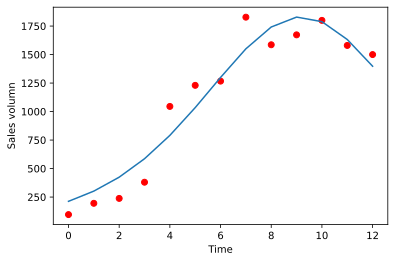

In [117]:
T = y.numel()
plt.xlabel("Time")
plt.ylabel("Sales volumn")
plt.plot(np.arange(T), bass(res[-1], T).numpy() * 1000)
plt.scatter(np.arange(T), y.numpy() * 1000, marker='o', color='red')

## 4. 构建神经网络的流程

### 4.1. 定义计算架构

In [118]:
class Net(nn.Module):
    def __init__(self, dim_feature, dim_hidden, dim_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(dim_feature, dim_hidden)
        self.output = nn.Linear(dim_hidden, dim_output)
    
    def forward(self, X):  # 层之间的计算次序
        f1 = torch.relu(self.hidden(X))  # 0-1
        f2 = self.output(f1)  # 1->2
        f3 = nn.functional.softmax(f2, dim=1)  # 2->3
        return f3

In [119]:
net = Net(dim_feature=2, dim_hidden=10, dim_output=2)

In [120]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)  # 指定需优化的参数
loss_func = nn.CrossEntropyLoss()  # 确定训练准则

### 4.2. 生成测试数据

In [121]:
x0 = torch.randn(100, 2) + 2  # 均值为 2
y0 = torch.zeros(100)
x1 = torch.randn(100, 2) - 2  # 均值为 -2
y1 = torch.ones(100)

x = torch.cat((x0, x1)).type(torch.FloatTensor)
y = torch.cat((y0, y1)).type(torch.LongTensor)

In [122]:
idx = np.arange(len(x))
np.random.shuffle(idx)
train_x, train_y = x[idx[:50]], y[idx[:50]]  # 随机选取50个
test_x, test_y = x[idx[50:]], y[idx[50:]]

In [123]:
train_y

tensor([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0])

### 4.3. 训练

In [124]:
for i in range(400):
    out = net(train_x)
    loss = loss_func(out, train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 40 == 0:
        with torch.no_grad():
            loss_train = loss_func(out, train_y)
            out_test = net.forward(test_x)
            loss_test = loss_func(out_test, test_y)
            print(f"loss_train: {loss_train}, loss_test: {loss_test}")

loss_train: 0.6422483325004578, loss_test: 0.6366799473762512
loss_train: 0.44171902537345886, loss_test: 0.4359949827194214
loss_train: 0.3774240016937256, loss_test: 0.37515488266944885
loss_train: 0.35611212253570557, loss_test: 0.35536712408065796
loss_train: 0.3459092378616333, loss_test: 0.3460897207260132
loss_train: 0.3398365080356598, loss_test: 0.34073367714881897
loss_train: 0.335786372423172, loss_test: 0.33726364374160767
loss_train: 0.3328193724155426, loss_test: 0.33483532071113586
loss_train: 0.3305293023586273, loss_test: 0.3330434560775757
loss_train: 0.32869574427604675, loss_test: 0.33167484402656555


In [125]:
train_result = net(train_x)
predict_train_y = torch.max(train_result, 1)[1]

test_result = net(test_x)
predict_test_y = torch.max(test_result, 1)[1]

x_list = [train_x, test_x]
y_list = [predict_train_y, predict_test_y]

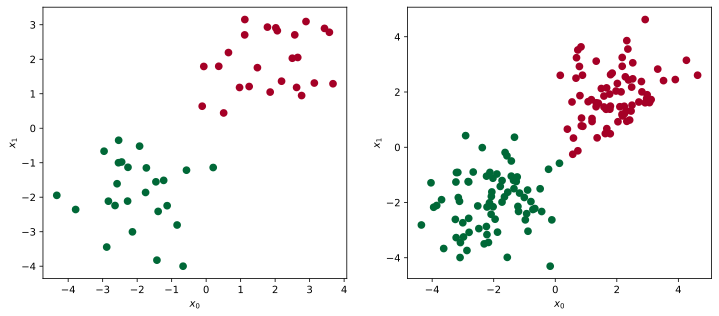

In [126]:
fig = plt.figure(figsize=(12, 5))
for i in range(2):
    px = x_list[i]
    py = y_list[i]
    ax = fig.add_subplot(1, 2, i+1)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.scatter(px.data.numpy()[:,0], px.data.numpy()[:,1], c=py.data.numpy(), s=60, lw=0, cmap='RdYlGn')

## 5. 案例： 垃圾邮件分类

In [127]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import os

利用`nn.Module`实现`Logit`回归

In [128]:
class LogitNet(nn.Module):
    def __init__(self, dim_feature, dim_output):
        super(LogitNet, self).__init__()
        self.output = nn.Linear(dim_feature, dim_output)
    
    def forward(self, X):  # 层之间的计算次序
        h = self.output(X)  # 1 -> 2
        o = nn.functional.softmax(h, dim=1)  # 2 -> 3
        return o

In [129]:
df = pd.read_csv('../dataset/smsspamcollection/SMSSpamCollection', delimiter='\t', header=None, names=['category', 'message'])
df['label'] = (df.category == 'ham').astype('int')
print('垃圾邮件数量: %d ' % np.sum(df.label == 0))
print('正常邮件数量: %d ' % np.sum(df.label == 0))

垃圾邮件数量: 747 
正常邮件数量: 747 


In [130]:
X = df.message.values
y = df.label.values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=200)
# y转换为tensor
y_train = torch.tensor(y_train).type(torch.LongTensor)  # 注意label的形式为1维，即类别的标签，无需reshape(-1, 1)
y_test = torch.tensor(y_test).type(torch.LongTensor)
# 获取词的tf-idf
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
# X转换为tensor
X_train = torch.tensor(X_train.toarray(), dtype=torch.float)
X_test = torch.tensor(X_test.toarray(), dtype=torch.float)

In [131]:
batch_size = 300  # 构建每批次100个样本的训练集
dataset = TensorDataset(X_train, y_train)
data_iter = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [132]:
snet = LogitNet(dim_feature=X_train.shape[1], dim_output=2)
optimizer = torch.optim.SGD(snet.parameters(), lr=0.03)  # 指定需优化的参数
# loss_func = nn.CrossEntropyLoss()  # 确定训练准则
loss_func = nn.NLLLoss()

In [133]:
for i in range(100):
    for X, y in data_iter:        
        loss = loss_func(snet.forward(X), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if i % 20 == 0:
        with torch.no_grad():
            loss_train = loss_func(snet.forward(X_train), y_train)
            out_test = snet.forward(X_test)
            loss_test = loss_func(out_test, y_test)
            print(f"loss_train: {loss_train:.5f}, loss_test: {loss_test:.5f}")

loss_train: -0.51918, loss_test: -0.51899
loss_train: -0.76334, loss_test: -0.76073
loss_train: -0.81675, loss_test: -0.81351
loss_train: -0.83511, loss_test: -0.83164
loss_train: -0.84403, loss_test: -0.84044


In [134]:
train_result = snet(X_train)
predict_y_train = torch.max(train_result, 1)[1]
print(torch.sum(predict_y_train != y_train), torch.sum(predict_y_train == y_train))

tensor(368) tensor(2418)


In [ ]:
a = torch.randn(4, 8)

In [ ]:
torch.std(a, 1)